# seaborn

References
- 

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Plotting

- Plot Types: regplot, lmplot, lineplot, barplot, swarmplot, scatterplot, violinplot, stripplot

## Regplot

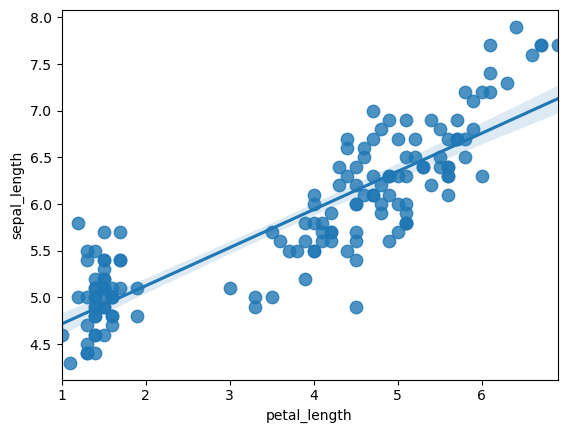

In [79]:
df = sns.load_dataset('iris')

sns.regplot(data=df,
        x='petal_length',
        y='sepal_length',
        #x_estimator=np.mean,
        scatter_kws={"s": 80},
        ci=95,
        )
plt.show()
print()

## lmplot

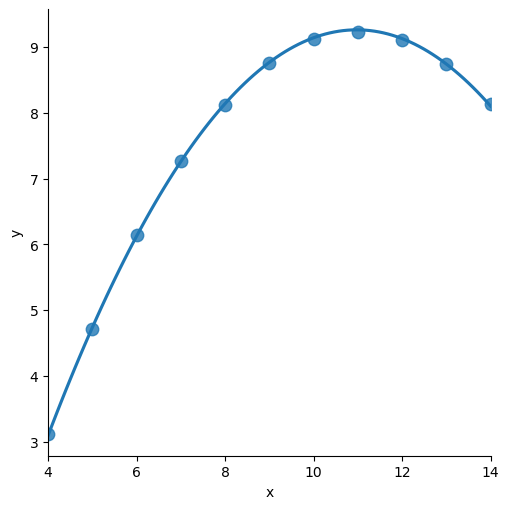

In [97]:
df = sns.load_dataset('anscombe')

sns.lmplot(data=df.query("dataset=='II'"),
            x='x',
            y='y',
            order=2,
            #robust=True,
            scatter_kws={"s": 80},
            y_jitter=0.03,
            ci=95,
            #lowess=True    # for nonparametric regression
            )
plt.show()
print()

## Barplot

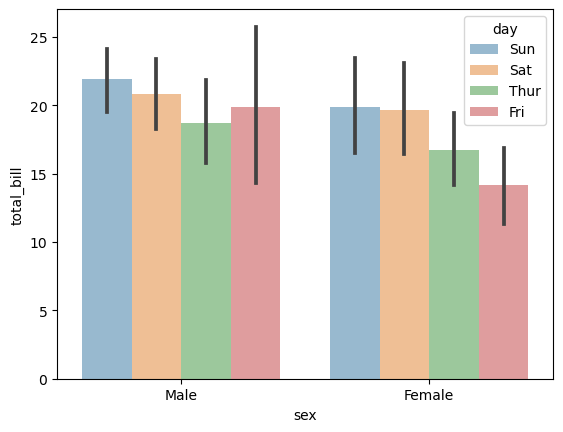

In [98]:
df = sns.load_dataset('tips')

labels = df['day'].unique()
sns.barplot(data=df,
        x='sex',
        y='total_bill',
        estimator=np.mean,  # default is mean
        hue='day',
        hue_order=labels,
        orient='v',
        alpha=0.5,
        ci=95,
        #ax=axs[i]
        )
plt.show()
print()

# Manipulations
- alpha: changes opacity
- boxprops=dict{'alpha': 0.5}: changes opacity for boxplots